# 주제 : 오늘 밤 유럽 축구, 어디가 이길까? 데이터로 분석하고 내기를 이겨보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 European Soccer Database 데이터셋을 사용합니다.
    
    - 다음 1개의 sqlite 데이터베이스를 사용합니다.
    database.sqlite

    - 데이터 베이스 내 총 7개의 Table을 사용합니다.
    Country: 국가 정보
    League: 리그 정보
    Match: 경기 정보 (주 데이터셋)
    Player: 플레이어 정보
    Player_Attributes: 플레이어의 특성
    Team: 팀 정보
    Team_Attributes: 팀의 특성
    
- 데이터 출처: https://www.kaggle.com/hugomathien/soccer

## 최종 목표
    - SQL 데이터셋에서 테이블을 읽어들이는 방법 이해
    - 여러개의 테이블을 통합하는 방법 이해
    - 수 많은 데이터로부터 관심있는 데이터를 식별
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 데이터베이스와 SQL

### 데이터베이스란
RDB (관계형 DB) : 컬럼간 상관성이 잇는 데이터끼리 엮어 놓은것 표로 되있다 (MYSQL, Oracle) 등이 있다

noSQL (비관계형 DB) : 비정형 데이터, 표가아닌 json형태로 되어있다. 특수한 경우는 json을 쓰는게 더 효율적이기도 함


### SQL과 Query
SQL (Structured Query Language): 관계형 데이터 베이스를 다룰때 쓴다.
- 영구적으로 저장할 저장소에 접근해서 하는방법
- In-memory (H2) RAM에다가 저장소를 두고 데이터를 다룸
- SQLite


## Step 1. 데이터셋 준비하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = 'e808743bea20e4a89b105256b9d5941b'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d hugomathien/soccer
!unzip '*.zip'




 55% 18.0M/32.7M [00:00<00:00, 31.7MB/s]
100% 32.7M/32.7M [00:00<00:00, 73.6MB/s]
Archive:  soccer.zip
  inflating: database.sqlite         


### 문제 3. sqlite3와 Pandas로 sqlite 데이터베이스 읽어들이기


In [6]:
import sqlite3


In [7]:
# sqlite3.connect()와 pd.read_sql_query()로 csv파일 읽어들이기
conn = sqlite3.connect('database.sqlite')
df_country = pd.read_sql_query('SELECT * from Country', conn)
df_league = pd.read_sql_query('SELECT * from League', conn)
df_match = pd.read_sql_query('SELECT * from Match', conn)
df_player = pd.read_sql_query('SELECT * from Player', conn)
df_player_att = pd.read_sql_query('SELECT * from Player_Attributes', conn)
df_team = pd.read_sql_query('SELECT * from Team', conn)
df_team_att = pd.read_sql_query('SELECT * from Team_Attributes', conn)

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임의 구조 파악하기


In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
df_country.head()
#국가 아이디랑 국가 이름


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [9]:
df_league.head()
# 리그 아이디, 국가 아이디, 리그 이름


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [10]:
# 1대1 매칭인지확인
# 모두 11개이다
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [11]:
df_league['id'].unique() #11개임 -> 각국가별로 하나의 리그만 있다

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [12]:
df_match.head()
#column 확인: 배당관련, goal, shoton,shoff등등 goal 이후 컬럼들은 제외하고 본다

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [13]:
for c, num in zip(df_match.columns, df_match.isna().sum()):
  print (c, num)
#df_match.describe하니까 너무 길어서 못봄
#team 에 관련된건 다 데이터가 차있다
# player 와 관련된건 최대 1832개만큼 데이터가 비어있다
# 홈 플ㄹㅠ

id 0
country_id 0
league_id 0
season 0
stage 0
date 0
match_api_id 0
home_team_api_id 0
away_team_api_id 0
home_team_goal 0
away_team_goal 0
home_player_X1 1821
home_player_X2 1821
home_player_X3 1832
home_player_X4 1832
home_player_X5 1832
home_player_X6 1832
home_player_X7 1832
home_player_X8 1832
home_player_X9 1832
home_player_X10 1832
home_player_X11 1832
away_player_X1 1832
away_player_X2 1832
away_player_X3 1832
away_player_X4 1832
away_player_X5 1832
away_player_X6 1832
away_player_X7 1832
away_player_X8 1832
away_player_X9 1833
away_player_X10 1833
away_player_X11 1839
home_player_Y1 1821
home_player_Y2 1821
home_player_Y3 1832
home_player_Y4 1832
home_player_Y5 1832
home_player_Y6 1832
home_player_Y7 1832
home_player_Y8 1832
home_player_Y9 1832
home_player_Y10 1832
home_player_Y11 1832
away_player_Y1 1832
away_player_Y2 1832
away_player_Y3 1832
away_player_Y4 1832
away_player_Y5 1832
away_player_Y6 1832
away_player_Y7 1832
away_player_Y8 1832
away_player_Y9 1833
away_player_Y

In [14]:
df_match.drop(df_match.columns[-38:], axis=1, inplace=True)

In [15]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_match.loc[df_match['league_id']==1729] #국가 아이디가 1729(잉글랜드) 의 매치 정보 가져오기

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,5.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,30373.0,24154.0,24157.0,30829.0,24224.0,25518.0,24228.0,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,5.0,7.0,9.0,1.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,11.0,23686.0,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,39297.0,26181.0,30960.0,36410.0,36373.0,36832.0,23115.0,37280.0,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,17866.0,30352.0,23927.0,24410.0,30660.0,37442.0,30617.0,24134.0,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,6.0,8.0,4.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,36374.0,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,24223.0,24773.0,34543.0,23139.0,34421.0,34987.0,35472.0,111865.0,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,1.0,3.0,5.0,7.0,9.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,11.0,30380.0,30357.0,24658.0,43280.0,23282.0,38609.0,24780.0,23782.0,23354.0,23264.0,26165.0,31432.0,46403.0,24208.0,23939.0,33963.0,47413.0,40198.0,42119.0,NaN,33633.0,107216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,4764,1729,1729,2015/2016,9,2015-10-17 00:00:00,1988795,8466,8197,2,2,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,35496.0,160627.0,26552.0,209405.0,46010.0,166676.0,23792.0,303339.0,279490.0,94267.0,41280.0,37770.0,49571.0,23571.0,38899.0,43061.0,139671.0,173317.0,319300.0,214570.0,20694.0,286119.0
4764

In [17]:
df_match['season'].unique() #다행히 일정한 구간으로 연도가 붙여져 있다

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [18]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [19]:
df_player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [20]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [21]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### 문제 5. 데이터프레임간의 관계 파악하기


In [22]:
# 데이터프레임 간 중복되는 Column이 있는지 확인하고 유용한 Column 식별하기
# Hint) unique()로 값을 비교하거나, map() 등을 활용하여 Column 관계를 확인
df_player_att['player_api_id'].value_counts() #중복되는 데이터가 있는지 본다
# 플레이당 최소 두번 쓰여져 있고 어떤 선수는 56번도 쓰임 -> 각 플레이어아이디 별로 평균내서 한다

210278    56
41269     56
42116     55
26472     54
179795    53
          ..
163254     2
266280     2
37366      2
238766     2
26568      2
Name: player_api_id, Length: 11060, dtype: int64

In [23]:
df_match['away_player_1']
# Nan 데이터도 있고 0~70만까지 데이터가 잇다. 첫 100000구간까지 대부분의 데이터가 있다
# float 형태임
df_match['home_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']).isna().sum() #series형태
#아이디별로 overall rating이 됨
# isna().sum() 해보면 0이됨. -> 'away_player_1' 데이터 안에 플레이어 아이디가 df_player_att에 다 있다

0

In [24]:
df_team_att['team_api_id'].value_counts()
df_match['away_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed']).isna().sum()

178

### 문제 6. 선수 특성 사이의 상관성 파악하기

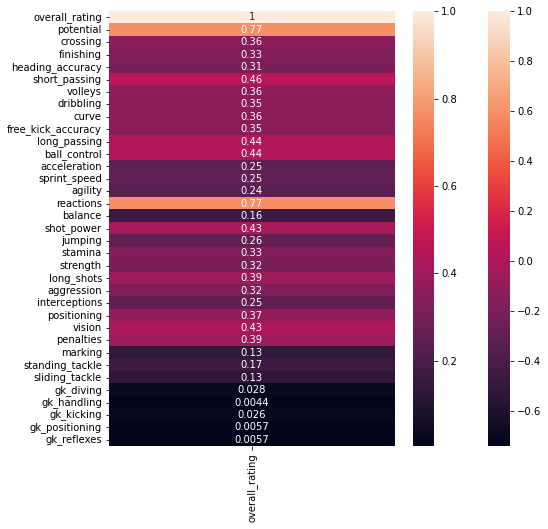

In [25]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
fig = plt.figure(figsize = (8,8))
sns.heatmap(df_player_att.drop(['id','player_fifa_api_id','player_api_id'],axis=1).corr())
sns.heatmap(df_player_att.drop(['id','player_fifa_api_id','player_api_id'],axis=1).corr()[['overall_rating']],annot=True)
#밝은부분이 연관성 높은것
# overall_rating이랑 potentiaㅣ 이랑 상관성이 높아보임
# reaction과 overall_rating이랑 연관성이 높아보임
# shot_power이랑 #long_shots 과 연관성이 높아보임
# 선수가 어떤것을 잘해야 좋은평가를 받는지 볼수있다



### 문제 7. 매치 데이터프레임에 팀 특성 데이터프레임 통합하기


In [26]:
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [27]:
# DataFrame의 map() 메소드를 활용하여 데이터프레임 통합하기
df_team_att.columns #일부는 뉴메릭 일부는 카테고리칼
df_team_att.info() #dribbling 데이터가 많이 빠짐
df_team_att.drop('buildUpPlayDribbling',axis = 1, inplace = True)






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [28]:
#team api id 도 중복값이 많아서 묶어줘야함
#근데 평균값으로 묶기엔 범주형데이터도 있음
most = lambda x: x.value_counts().index[0]
#같은 아이디안에서 범주형데이터를 각각 카운트하고
#그 아이디에서 가장많이 카운트된 범주형 데이터를  
#같은 아이디끼리 묶을때 값으로 한다

In [29]:
team_map = df_team_att.groupby('team_api_id').aggregate(
    {
       'buildUpPlaySpeed': 'mean',
       'buildUpPlaySpeedClass': most,
       'buildUpPlayDribblingClass': most,
       'buildUpPlayPassing': 'mean',
       'buildUpPlayPassingClass': most,
       'buildUpPlayPositioningClass': most,
       'chanceCreationPassing': 'mean',
       'chanceCreationPassingClass': most,
       'chanceCreationCrossing': 'mean',
       'chanceCreationCrossingClass': most,
       'chanceCreationShooting': 'mean',
       'chanceCreationShootingClass': most,
       'chanceCreationPositioningClass': most,
       'defencePressure': 'mean',
       'defencePressureClass': most,
       'defenceAggression': 'mean',
       'defenceAggressionClass': most,
       'defenceTeamWidth': 'mean',
       'defenceTeamWidthClass': most,
       'defenceDefenderLineClass': most
    }
)

In [30]:
team_map #각 id 별로 aggregation 잘됨

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,
1601,47.333333,Balanced,Little,46.166667,Mixed,Organised,55.500000,Normal,60.333333,Normal,53.500000,Normal,Organised,47.166667,Medium,47.333333,Press,49.333333,Normal,Cover
1773,52.000000,Balanced,Little,50.000000,Mixed,Organised,50.000000,Normal,53.000000,Normal,54.000000,Normal,Organised,43.000000,Medium,44.000000,Press,50.000000,Normal,Cover
1957,47.166667,Balanced,Little,52.666667,Mixed,Organised,50.833333,Normal,36.333333,Normal,67.000000,Normal,Organised,49.333333,Medium,56.333333,Press,53.666667,Normal,Cover
2033,49.000000,Balanced,Little,48.400000,Mixed,Organised,51.800000,Normal,44.200000,Normal,48.200000,Normal,Free Form,42.200000,Medium,33.800000,Contain,45.400000,Normal,Cover
2182,60.333333,Fast,Little,49.000000,Mixed,Organised,56.666667,Normal,57.333333,Normal,68.000000,Lots,Organised,51.666667,Medium,48.500000,Press,54.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,Balanced,Little,53.666667,Mixed,Organised,50.333333,Normal,59.166667,Lots,50.333333,Normal,Organised,45.500000,Medium,51.166667,Press,52.666667,Normal,Cover
108893,43.166667,Balanced,Little,53.166667,Mixed,Organised,46.000000,Normal,38.333333,Normal,39.500000,Normal,Organised,38.333333,Medium,46.000000,Press,46.333333,Normal,Cover
158085,67.000000,Fast,Normal,39.000000,Mixed,Organised,55.000000,Normal,59.000000,Normal,46.000000,Normal,Organised,36.000000,Medium,38.000000,Press,37.000000,Normal,Cover


In [31]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [32]:
#위에서 만든 데이터에 데이터 정보 집어넣기
df = df_match[['home_team_goal', 'away_team_goal']].copy()
for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [33]:
df.dropna(inplace = True)


In [34]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover


### 문제 8. 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기

In [35]:
# 홈과 어웨이의 골 수를 범주형 데이터로 변환하기 (0: 홈팀 승, 1: 무승부, 2: 어웨이팀 승)
df['matchResult'] = df[['home_team_goal','away_team_goal']].aggregate(lambda x : 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis=1)

In [36]:
df.drop(['home_team_goal','away_team_goal'],axis =1, inplace = True)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 9. get_dummies를 이용하여 범주형 데이터 전처리하기

In [37]:
#범주형 데이터는 'class'라고 쓰여져 있음
#'class'가 포함된 컬럼끼리 묶어서 범주형 데이터용 데이터셋을 만듬
col_cats = list(filter(lambda s: s.find('Class') >= 0, df.columns))
df_cats= pd.get_dummies(df[col_cats],drop_first = True)
df_cats


,home_buildUpPlaySpeedClass_Fast,home_buildUpPlaySpeedClass_Slow,home_buildUpPlayDribblingClass_Lots,home_buildUpPlayDribblingClass_Normal,home_buildUpPlayPassingClass_Mixed,home_buildUpPlayPassingClass_Short,home_buildUpPlayPositioningClass_Organised,home_chanceCreationPassingClass_Risky,home_chanceCreationPassingClass_Safe,home_chanceCreationCrossingClass_Lots,home_chanceCreationCrossingClass_Normal,home_chanceCreationShootingClass_Lots,home_chanceCreationShootingClass_Normal,home_chanceCreationPositioningClass_Organised,home_defencePressureClass_High,home_defencePressureClass_Medium,home_defenceAggressionClass_Double,home_defenceAggressionClass_Press,home_defenceTeamWidthClass_Normal,home_defenceTeamWidthClass_Wide,home_defenceDefenderLineClass_Offside Trap,away_buildUpPlaySpeedClass_Fast,away_buildUpPlaySpeedClass_Slow,away_buildUpPlayDribblingClass_Lots,away_buildUpPlayDribblingClass_Normal,away_buildUpPlayPassingClass_Mixed,away_buildUpPlayPassingClass_Short,away_buildUpPlayPositioningClass_Organised,away_chanceCreationPassingClass_Risky,away_chanceCreationPassingClass_Safe,away_chanceCreationCrossingClass_Lots,away_chanceCreationCrossingClass_Normal,away_chanceCreationShootingClass_Lots,away_chanceCreationShootingClass_Normal,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Offside Trap
0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0
1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
2,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0,0
3,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,1,0,0
5,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
25974,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
25975,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0
25976,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0


### 문제 10. StandardScaler를 이용해 수치형 데이터 표준화하기


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df.drop(['matchResult'] + col_cats, axis = 1)
scalar = StandardScaler()
scalar.fit(X_num)
X_scaled = scalar.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns
                        =X_num.columns)


X_cat = df_cats
X = pd.concat([X_scaled, X_cat], axis = 1)
y = df['matchResult']

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25629 entries, 0 to 25978
Data columns (total 58 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   home_buildUpPlaySpeed                          25629 non-null  float64
 1   home_buildUpPlayPassing                        25629 non-null  float64
 2   home_chanceCreationPassing                     25629 non-null  float64
 3   home_chanceCreationCrossing                    25629 non-null  float64
 4   home_chanceCreationShooting                    25629 non-null  float64
 5   home_defencePressure                           25629 non-null  float64
 6   home_defenceAggression                         25629 non-null  float64
 7   home_defenceTeamWidth                          25629 non-null  float64
 8   away_buildUpPlaySpeed                          25629 non-null  float64
 9   away_buildUpPlayPassing                        256

### 문제 11. 학습데이터와 테스트데이터 분리하기


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =1)

## Step 4. Classification 모델 학습하기


### 문제 12. Logistic Regression 모델 생성/학습하기


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter = 10000)
model_lr.fit(X_train,y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.metrics import classification_report

In [46]:
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.87      0.63      3484
           1       0.27      0.00      0.01      1972
           2       0.46      0.31      0.37      2233

    accuracy                           0.49      7689
   macro avg       0.41      0.40      0.34      7689
weighted avg       0.43      0.49      0.39      7689



In [47]:
print(sum(y_test == 0) / len(y_test)) #test 데이터 중에 홈팀이 이긴경우(0)은 0.45인데
#학습해서 나온것은 홈팀이 이긴것의 비율이 0.48
print(sum(y_test == 1) / len(y_test))
print(sum(y_test == 2) / len(y_test))

0.4531148393809338
0.2564702822213552
0.290414878397711


### 문제 13. 모델 학습 결과 평가하기


In [48]:
from sklearn.metrics import classification_report

In [49]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




SyntaxError: ignored

### 문제 14. XGBoost 모델 생성/학습하기


In [73]:
from xgboost import XGBClassifier

In [72]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)




NameError: ignored

### 문제 15. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)

print(classification_report(y_test, pred))
#절반 넘게 맞춤 -> 50프로이상이면 결국 더 많이 맞춘쪽으로 잘됨 

## Step5 모델 학습 결과 심화 분석하기


### 문제 16. Logistic Regression 모델 계수로 상관성 파악하기

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
plt.figure(figsize = (15,5))
plt.plot(X.columns, model_lr.coef_[0])
plt.xticks(rotation=90)
plt.title('What makes home team win')
plt.grid()
plt.show()
#away_defense pressure 가 높은 영향: away 에서 수비를 강하게 하려고 하면 홈팀이 이김
#away가 크로스를 잘 못만드는 팀이면 홈팀이 이기는거에 영향


In [ ]:
plt.figure(figsize = (15,5))
plt.plot(X.columns, model_lr.coef_[2])
plt.xticks(rotation=90)
plt.title('What makes home team lose')
plt.grid()
plt.show()

### 문제 17. XGBoost 모델로 특징의 중요도 확인하기

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
plt.figure(figsize = (15,5))

plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.grid()
plt.show()
#모델이 예측시 카테고리컬 데이터에서 힌트를 많이 얻는 모양임
#수치형 데이터들은 별로 영향을 주지 못함

## Step6 모델 성능 개선하기


### 문제 18. 매치 데이터프레임에 선수 특성 데이터프레임 통합하기

In [ ]:
# 선수 특성 중 유의미한 정보를 매치 데이터프레임에 통합하기





In [50]:
# 선수 특성 중 유의미한 정보를 매치 데이터프레임에 통합하기
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [51]:
for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [52]:
df_player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [53]:
player_map = df_player_att.groupby('player_api_id').mean()['overall_rating']
player_map

player_api_id
2625      60.142857
2752      69.380952
2768      69.285714
2770      71.133333
2790      70.200000
            ...    
744907    51.909091
746419    59.000000
748432    58.000000
750435    56.444444
750584    58.000000
Name: overall_rating, Length: 11060, dtype: float64

In [55]:
for col in (s + str(idx) for s in ['home_player_', 'away_player_'] for idx in range(1,12)):
  df[col +'_rating'] = df_match[col].map(player_map)

In [58]:
df.isna().sum().max() #nan값 1555 전체 25000개니까 드랍해도 될듯

1555

In [59]:
df.dropna(inplace=True) #nan값있는 row들 다 제거

In [60]:
df.head() #nan 값없는거 확인

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
145,2,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,63.214286,62.733333,70.151515,61.800000,69.192308,61.500000,63.538462,68.040000,54.600000,65.285714,62.666667,64.952381,71.388889,60.750000,66.750000,70.185185,69.333333,68.000000,65.000000,71.666667,64.611111,71.826087
153,1,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.0,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,65.050000,63.142857,62.454545,63.227273,64.625000,71.800000,67.500000,66.000000,69.700000,67.129032,63.500000,71.266667,68.142857,70.375000,69.888889,70.720000,68.444444,68.541667,71.739130,71.190476,69.714286,69.130435
155,2,0,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.5,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,67.888889,71.060606,68.958333,69.823529,72.166667,72.107143,77.972973,71.416667,79.692308,68.086957,70.896552,67.095238,67.625000,61.750000,63.722222,63.411765,64.714286,68.000000,70.521739,67.500000,65.666667,66.083333
162,2,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,63.214286,62.733333,70.151515,65.285714,68.040000,69.192308,61.800000,63.538462,54.600000,67.846154,62.666667,67.888889,71.060606,72.166667,64.100000,69.407407,72.107143,69.240000,79.692308,77.972973,71.416667,70.896552
168,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.0,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.16666

In [64]:
df.isna().sum().max()

0

### 문제 19. 모델 재학습하여 평가하기

In [65]:

df['matchResult'] = df[['home_team_goal','away_team_goal']].aggregate(lambda x : 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis=1)
df.drop(['home_team_goal','away_team_goal'],axis =1, inplace = True)


In [66]:
df.columns

Index(['home_buildUpPlaySpeed', 'home_buildUpPlaySpeedClass',
       'home_buildUpPlayDribblingClass', 'home_buildUpPlayPassing',
       'home_buildUpPlayPassingClass', 'home_buildUpPlayPositioningClass',
       'home_chanceCreationPassing', 'home_chanceCreationPassingClass',
       'home_chanceCreationCrossing', 'home_chanceCreationCrossingClass',
       'home_chanceCreationShooting', 'home_chanceCreationShootingClass',
       'home_chanceCreationPositioningClass', 'home_defencePressure',
       'home_defencePressureClass', 'home_defenceAggression',
       'home_defenceAggressionClass', 'home_defenceTeamWidth',
       'home_defenceTeamWidthClass', 'home_defenceDefenderLineClass',
       'away_buildUpPlaySpeed', 'away_buildUpPlaySpeedClass',
       'away_buildUpPlayDribblingClass', 'away_buildUpPlayPassing',
       'away_buildUpPlayPassingClass', 'away_buildUpPlayPositioningClass',
       'away_chanceCreationPassing', 'away_chanceCreationPassingClass',
       'away_chanceCreationCrossi

In [67]:
col_cats

['home_buildUpPlaySpeedClass',
 'home_buildUpPlayDribblingClass',
 'home_buildUpPlayPassingClass',
 'home_buildUpPlayPositioningClass',
 'home_chanceCreationPassingClass',
 'home_chanceCreationCrossingClass',
 'home_chanceCreationShootingClass',
 'home_chanceCreationPositioningClass',
 'home_defencePressureClass',
 'home_defenceAggressionClass',
 'home_defenceTeamWidthClass',
 'home_defenceDefenderLineClass',
 'away_buildUpPlaySpeedClass',
 'away_buildUpPlayDribblingClass',
 'away_buildUpPlayPassingClass',
 'away_buildUpPlayPositioningClass',
 'away_chanceCreationPassingClass',
 'away_chanceCreationCrossingClass',
 'away_chanceCreationShootingClass',
 'away_chanceCreationPositioningClass',
 'away_defencePressureClass',
 'away_defenceAggressionClass',
 'away_defenceTeamWidthClass',
 'away_defenceDefenderLineClass']

In [68]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df.drop(['matchResult'] + col_cats, axis = 1)
scalar = StandardScaler()
scalar.fit(X_num)
X_scaled = scalar.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns
                        =X_num.columns)


X_cat = pd.get_dummies(df[col_cats], drop_first = True)
X = pd.concat([X_scaled, X_cat], axis = 1)
y = df['matchResult']

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =1)

In [69]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter = 10000)
model_lr.fit(X_train,y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
from sklearn.metrics import classification_report

In [71]:
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.56      0.83      0.66      2945
           1       0.31      0.01      0.03      1587
           2       0.48      0.50      0.49      1842

    accuracy                           0.53      6374
   macro avg       0.45      0.45      0.39      6374
weighted avg       0.47      0.53      0.45      6374



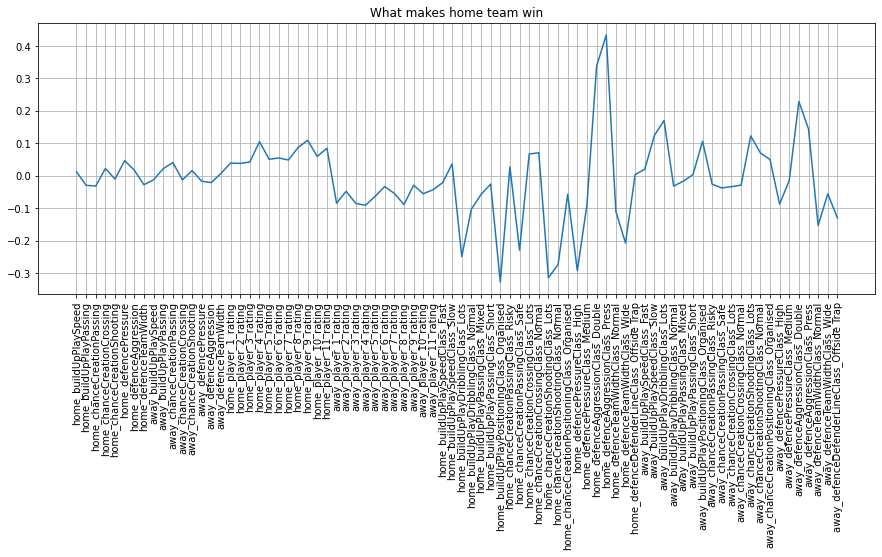

In [77]:
#0.53으로 정확도가 상승되었다!


plt.figure(figsize = (15,5))
plt.plot(X.columns, model_lr.coef_[0])
plt.xticks(rotation=90)
plt.title('What makes home team win')
plt.grid()
plt.show()
#여전히 categoical 데이터가 우세
# overall_rating관련 column들이 팀에대한 숫자들에 비하면 더 높은 영향력이 있다
# away 팀 선수들이 좋으면 결과가 패쪽으로 감(당연)

In [74]:
from xgboost import XGBClassifier

In [75]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 15. 모델 학습 결과 평가하기


In [76]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)

print(classification_report(y_test, pred))
#절반 넘게 맞춤 -> 50프로이상이면 결국 더 많이 맞춘쪽으로 잘됨 

              precision    recall  f1-score   support

           0       0.55      0.84      0.66      2945
           1       0.36      0.02      0.03      1587
           2       0.49      0.47      0.48      1842

    accuracy                           0.53      6374
   macro avg       0.46      0.44      0.39      6374
weighted avg       0.48      0.53      0.45      6374



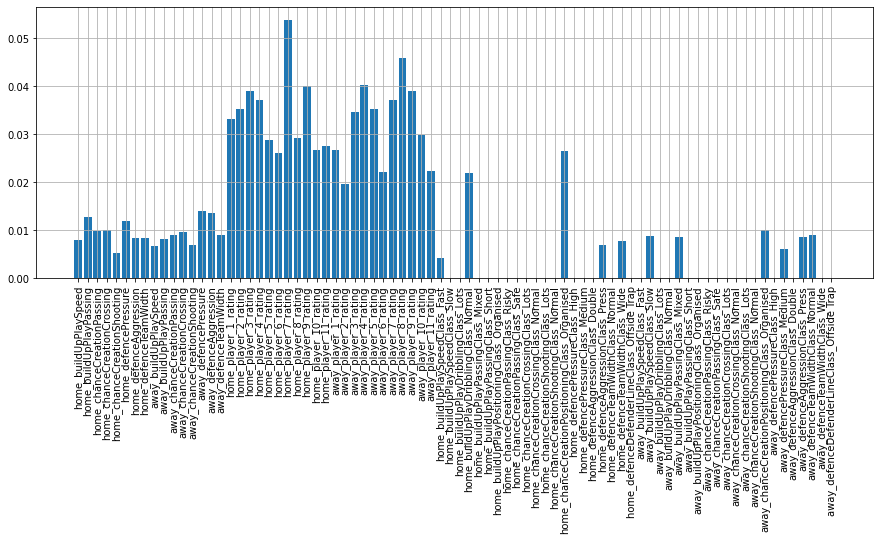

In [78]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
plt.figure(figsize = (15,5))

plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.grid()
plt.show()
#팀간의 상성보다
#선수들의 능력이 더 중요하다고 나옴 팀의 중요도가 엄청 낮음
# 플레이어에 대한 정보만 넣어줘도 비슷한 accuracy를 나올수도 있을듯


In [ ]:
#한번에 가장좋은 모델을 만드려고 안해도됨
#엄청 규모가 커서 한번에 다하는게 불가능하다
#고객이 원하는 정보를 원하는 시점안에 줘야하기때문에 고객 만족도를 위해 적절한 수준에서 일단 모델을 만들어놓고 개선하는 식으로 한다
#그리고 베이스라인 (최소성능을 보장해놓고) 이후에 더 발전 가능성을 찾아가는 과정이 중요
# MULTICOLLINEARITY 등 오류를 발견해 가면서